In [1]:
from pyforest import*


## Problem Statement: --

### About Company
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

### Problem
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
combined = pd.concat([train, test], sort = False, ignore_index = True)

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [31]:
print(train.shape)
print(test.shape)
combined.shape

(614, 13)
(367, 12)


(981, 13)

In [21]:
combined.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [47]:
combined.isnull().sum()[combined.isnull().sum()!=0]

Gender               24
Married               3
Dependents           25
Self_Employed        55
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Loan_Status         367
dtype: int64

In [27]:
train.groupby('Gender')['Married'].value_counts()

Gender  Married
Female  No          80
        Yes         31
Male    Yes        357
        No         130
Name: Married, dtype: int64

## Base Model:-


In [23]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

# Preparing Data for Submission
solution = pd.DataFrame({"Loan_ID":test.Loan_ID, 
                        "Loan_Status":'N'})
solution.to_csv("Base MODEL.csv", index =False)

In [24]:
cd

C:\Users\hp


In [26]:
train.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


## Univariet Analysis:--

In [33]:
combined.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

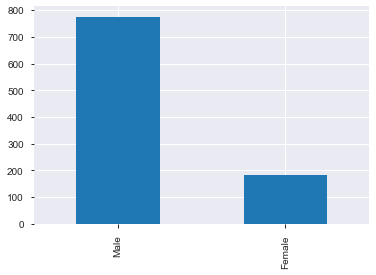

In [43]:
combined.Gender.value_counts().plot(kind='bar')

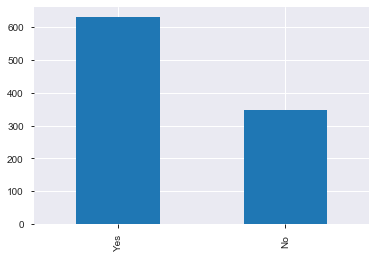

In [45]:
combined.Married.value_counts().plot(kind='bar')
plt.show()

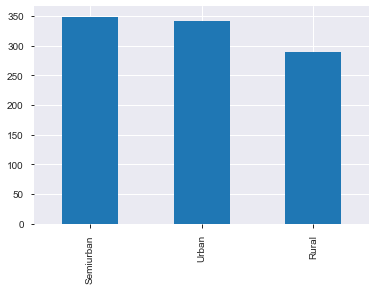

In [86]:
combined.Property_Area.value_counts().plot(kind='bar')
plt.show()

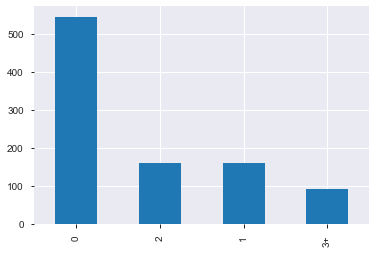

In [46]:
combined.Dependents.value_counts().plot(kind='bar')
plt.show()

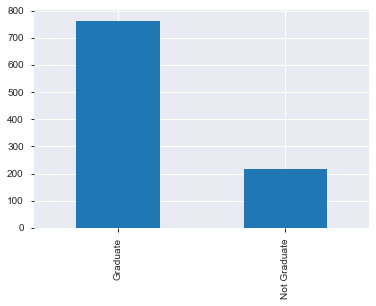

In [48]:
combined.Education.value_counts().plot(kind='bar')
plt.show()

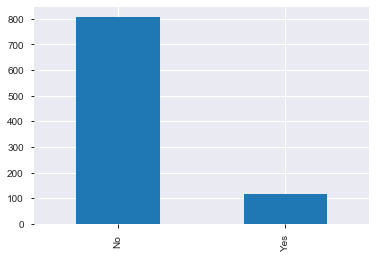

In [49]:
combined.Self_Employed.value_counts().plot(kind='bar')
plt.show()

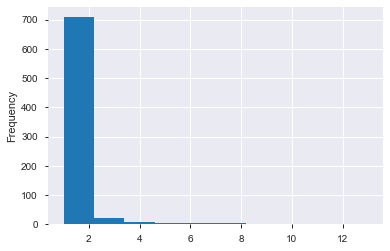

In [54]:
combined.ApplicantIncome.value_counts().plot(kind='hist')
plt.show()

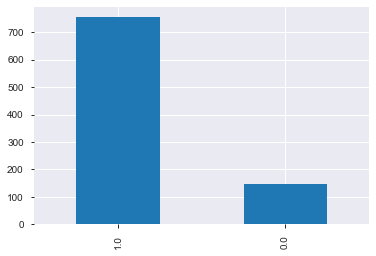

In [55]:
combined.Credit_History.value_counts().plot(kind='bar')
plt.show()

# Bi-Variet:-

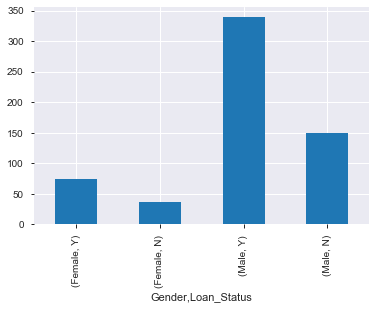

In [61]:
train.groupby('Gender')['Loan_Status'].value_counts().plot(kind='bar')

In [65]:
train.groupby('Gender')['Loan_Status'].value_counts()

Gender  Loan_Status
Female  Y               75
        N               37
Male    Y              339
        N              150
Name: Loan_Status, dtype: int64

In [66]:
pd.crosstab(combined.Gender,combined.Loan_Status)

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


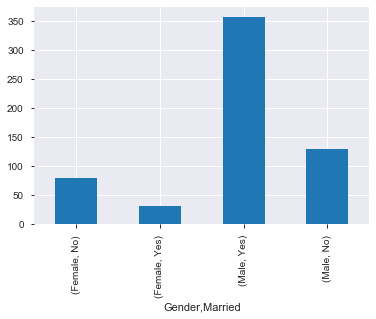

In [62]:
train.groupby('Gender')['Married'].value_counts().plot(kind='bar')

In [67]:
pd.crosstab(combined.Married,combined.Loan_Status)

Loan_Status,N,Y
Married,,
No,79,134
Yes,113,285


In [71]:
pd.crosstab(combined.Gender,combined.Married)

Married,No,Yes
Gender,,
Female,124,57
Male,212,561


In [76]:
pd.crosstab(combined.Credit_History,combined.Loan_Status)

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


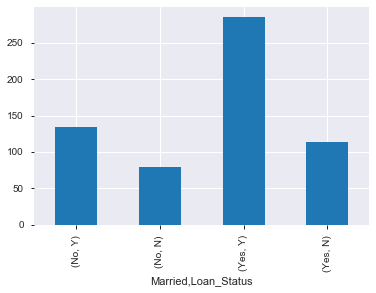

In [63]:
train.groupby('Married')['Loan_Status'].value_counts().plot(kind='bar')

In [64]:
train.groupby('Dependents')['Loan_Status'].value_counts()

Dependents  Loan_Status
0           Y              238
            N              107
1           Y               66
            N               36
2           Y               76
            N               25
3+          Y               33
            N               18
Name: Loan_Status, dtype: int64

In [77]:
combined.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [79]:
pd.crosstab(combined.Property_Area,combined.Loan_Status)

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


In [92]:
pd.crosstab(combined.LoanAmount,combined.Loan_Status).describe()

Loan_Status,N,Y
count,203.000000,203.000000
mean,0.891626,2.024631
std,0.994081,2.355609
min,0.000000,0.000000
25%,0.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,3.000000
max,5.000000,17.000000


In [94]:
pd.crosstab(combined.Loan_Amount_Term,combined.Loan_Status)

Loan_Status,N,Y
Loan_Amount_Term,,
12.0,0,1
36.0,2,0
60.0,0,2
84.0,1,3
120.0,0,3
180.0,15,29
240.0,1,3
300.0,5,8
360.0,153,359


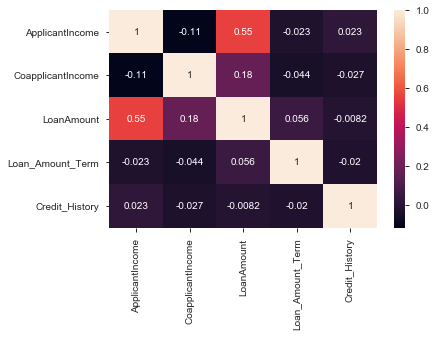

In [96]:
sns.heatmap(combined.corr(),annot=True)

In [5]:
import ppscore as pps # Predictive power score
pps.score(combined, 'Loan_Amount_Term', 'Loan_Status')

{'x': 'Loan_Amount_Term',
 'y': 'Loan_Status',
 'task': 'classification',
 'ppscore': 0.040110033980877646,
 'metric': 'weighted F1',
 'baseline_score': 0.5634319526627218,
 'model_score': 0.5809427118763855,
 'model': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best')}

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated clas

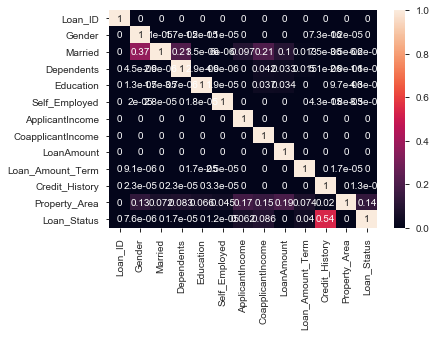

In [7]:
sns.heatmap(pps.matrix(combined),annot=True)

In [103]:
pd.crosstab(combined.Gender,combined.Loan_Status)

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


In [109]:
pd.crosstab(combined.Education,combined.Loan_Status)

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


In [110]:
pd.crosstab(combined.Education,combined.Self_Employed)

Self_Employed,No,Yes
Education,,
Graduate,626,94
Not Graduate,181,25
